<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/MLP/OPPE/Mock_for_OPPE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://raw.githubusercontent.com/dineshkumarsarangapani/Machine_learning_IITM/main/MLP/OPPE/V1_oppe3.csv'

In [3]:
import pandas as pd

train_data = pd.read_csv('https://raw.githubusercontent.com/dineshkumarsarangapani/Machine_learning_IITM/main/MLP/OPPE/V1_oppe3.csv')

In [4]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,IncomeGroup
0,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K
1,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
2,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
3,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
train_data.shape

(20000, 15)

In [7]:
train_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
IncomeGroup       0
dtype: int64

In [8]:
import numpy as np

train_data.replace(" ?", np.nan, inplace=True)

In [9]:
train_data.isna().sum()

age                  0
workclass         1137
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1140
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     354
IncomeGroup          0
dtype: int64

In [11]:
1140/20000

0.057

In [20]:
train_data['IncomeGroup'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [21]:
len(train_data[train_data['IncomeGroup'] == " <=50K"])

15302

In [22]:
15302/20000

0.7651

In [23]:
train_data['age'].mean()

38.553

In [24]:
train_data['education'].unique()

array([' 7th-8th', ' 11th', ' Bachelors', ' HS-grad', ' Some-college',
       ' Masters', ' Assoc-voc', ' Doctorate', ' 5th-6th', ' 10th',
       ' 12th', ' Assoc-acdm', ' Prof-school', ' 9th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [27]:
len(train_data[train_data['education'] == ' Preschool'])

32

In [29]:
train_data.corr()

<ipython-input-29-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.071322,0.042720,0.082959,0.054860,0.068613
fnlwgt,-0.071322,1.000000,-0.050441,-0.009390,-0.012992,-0.018445
education-num,0.042720,-0.050441,1.000000,0.124567,0.080085,0.140452
capital-gain,0.082959,-0.009390,0.124567,1.000000,-0.031598,0.084474
capital-loss,0.054860,-0.012992,0.080085,-0.031598,1.000000,0.049945
hours-per-week,0.068613,-0.018445,0.140452,0.084474,0.049945,1.000000


In [34]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [31]:
impute = SimpleImputer(strategy='most_frequent')

In [35]:
ColumnTransformer?

In [50]:
trans = ColumnTransformer([("simple", impute,['workclass', 'occupation', 'native-country'])], remainder='drop')

In [53]:
train_data_trans = pd.DataFrame(trans.fit_transform(train_data), columns = ['workclass', 'occupation', 'native-country'])

In [54]:
train_data_trans.shape

(20000, 3)

In [55]:
train_data_trans['occupation'].mode()

0     Prof-specialty
Name: occupation, dtype: object

In [56]:
train_data_trans['occupation'].value_counts()

 Prof-specialty       3663
 Craft-repair         2510
 Exec-managerial      2497
 Adm-clerical         2352
 Sales                2229
 Other-service        2062
 Machine-op-inspct    1198
 Transport-moving      977
 Handlers-cleaners     851
 Farming-fishing       607
 Tech-support          570
 Protective-serv       392
 Priv-house-serv        86
 Armed-Forces            6
Name: occupation, dtype: int64

In [ ]:
train_data_trans['occupation']

In [57]:
train_data_next = train_data.copy()

In [58]:
train_data_next['occupation'] = train_data_trans['occupation']
train_data_next['workclass'] = train_data_trans['workclass']
train_data_next['native-country'] = train_data_trans['native-country']


In [59]:
y = train_data_next['IncomeGroup']

In [62]:
train_data_next.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
IncomeGroup       object
dtype: object

In [63]:
x1 = train_data_next[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week' ]]

In [65]:
x2 = train_data_next[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race' ,'sex', 'native-country']]

In [66]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [67]:
onehot = OneHotEncoder(sparse = False)

In [68]:
x2_one = onehot.fit_transform(x2)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [69]:
std = StandardScaler()

In [97]:
x1_std = std.fit_transform(x1)

In [98]:
x1.shape

(20000, 6)

In [99]:
x2.shape

(20000, 8)

In [100]:
type(x1_std)

numpy.ndarray

In [101]:
type(x2_one)

numpy.ndarray

In [102]:
X1 = pd.DataFrame(x1_std)
X2 = (pd.DataFrame(x2_one))

In [103]:
X = pd.concat([X1, X2], axis=1)

In [104]:
X.shape

(20000, 105)

In [105]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [109]:
y_train.shape

(16000,)

In [111]:
from sklearn.linear_model import Perceptron

In [113]:
pp = Perceptron(fit_intercept=True, warm_start=False)

In [114]:
pp.fit(X_train, y_train)

Perceptron()

In [115]:
pp.score(X_train, y_train)

0.813

In [211]:
pp.intercept_

array([-6.])

In [207]:
pp1 = Perceptron(fit_intercept=True, warm_start=False, early_stopping=True)

In [208]:
pp1.fit(X_train, y_train)

Perceptron(early_stopping=True)

In [209]:
pp1.intercept_

array([-6.])

In [206]:
pp1.coef_

array([[ -1.59016907,   1.33253868,   7.50172873,  12.0367287 ,
          2.26258718,  -2.3611258 ,   3.        ,  -1.        ,
          0.        ,  -2.        ,   0.        ,  -2.        ,
          0.        ,  -4.        ,   1.        ,   0.        ,
         -1.        ,  -3.        ,   7.        ,   1.        ,
          2.        ,  -1.        ,  -2.        ,   3.        ,
          0.        ,   0.        ,  -1.        ,  -9.        ,
         -4.        ,   1.        ,  -3.        ,  11.        ,
          7.        , -10.        ,  -4.        ,  -6.        ,
         -1.        ,  -3.        ,   0.        ,   2.        ,
         -1.        ,  -6.        ,  -1.        ,   1.        ,
         -3.        ,  -9.        ,   3.        ,   3.        ,
          5.        ,   4.        ,  -1.        ,  -4.        ,
          1.        ,  -3.        ,  -3.        ,   1.        ,
          2.        ,  -4.        ,   0.        ,   1.        ,
         -3.        ,   0.        ,  -4.

In [120]:
# Perceptron?

In [128]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
LogisticRegression?

In [124]:
sgd = SGDClassifier(loss='log', penalty='l2', max_iter=10,learning_rate='constant', eta0=0.01, alpha=0.001,random_state=64,warm_start=False)

In [125]:
sgd.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=10, random_state=64)

In [126]:
sgd.score(X_train,y_train)

0.8510625

In [127]:
sgd.score(X_test,y_test)

0.84825

In [129]:
lreg = LogisticRegression(solver='sag',random_state=64, tol=1e-3, max_iter=100)

In [130]:
lreg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=64, solver='sag', tol=0.001)

In [131]:
y_pred_leg = lreg.predict(X_test)

In [136]:
from sklearn.metrics import recall_score, classification_report
classification_report?

In [137]:
print(classification_report(y_test, y_pred_leg))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3074
        >50K       0.70      0.58      0.64       926

    accuracy                           0.85      4000
   macro avg       0.79      0.75      0.77      4000
weighted avg       0.84      0.85      0.84      4000



In [141]:
# recall_score?
recall_score(y_test, y_pred_leg, average='macro')

0.7528715724863027

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
KNeighborsClassifier?

In [156]:
params = {
    'n_neighbors': [1,3,5,7],
    "metric":['minkowski'],
    'p': [2]
}

In [157]:
gcv = GridSearchCV(KNeighborsClassifier(), params, cv=4)

In [158]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [1, 3, 5, 7],
                         'p': [2]})

In [159]:
gcv.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'p': 2}

In [212]:
dec_params = {
    'criterion': ['entropy' , 'gini'],
    'splitter': ['random' , 'best'],
    'min_samples_leaf':[2,4,6,8,10],
    'max_depth':[3,4,5,6]

}

In [213]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier?

In [214]:
tree = DecisionTreeClassifier(random_state = 64)

In [215]:
gcv_dec = GridSearchCV(tree, dec_params, cv=4)

In [216]:
gcv_dec.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=64),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [217]:
gcv_dec.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [224]:
tree_best = DecisionTreeClassifier(random_state = 64, criterion='gini', max_depth= 6, min_samples_leaf=10, splitter='best')

In [225]:
tree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=64)

In [226]:
tree_best.score(X_test, y_test)

0.84975

In [227]:
from sklearn.tree import plot_tree

In [228]:
plot_tree?

75

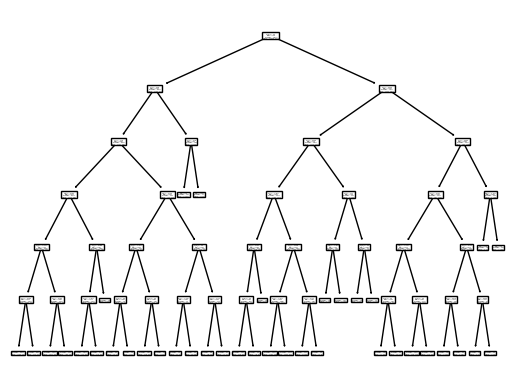

In [229]:
len(plot_tree(tree_best))

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
forest = RandomForestClassifier(random_state=64)

In [179]:
RandomForestClassifier?

In [180]:
params = {
 'n_estimators': [5,6,7,8,9,10]   
}

In [181]:
grid_forest = GridSearchCV(forest, params)

In [182]:
grid_forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=64),
             param_grid={'n_estimators': [5, 6, 7, 8, 9, 10]})

In [183]:
grid_forest.best_params_

{'n_estimators': 10}

In [184]:
grid_forest.best_score_

0.8476250000000001

In [185]:
forest_best = RandomForestClassifier(n_estimators=10, random_state=64)

In [186]:
forest_best.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=64)

In [188]:
from sklearn.ensemble import AdaBoostClassifier

In [190]:
boost = AdaBoostClassifier(random_state = 64)

In [191]:
params_ada = {
    'n_estimators': [10,20,30],
     'learning_rate':[0.5,1,2]

}

Use n_estimators as [10,20,30]
random_state = 64
Use learning_rate as [0.5,1,2]
Take cv value= 4

In [192]:
ada_grid = GridSearchCV(boost, params_ada, cv=4)

In [193]:
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=64),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [10, 20, 30]})

In [194]:
ada_grid.best_params_

{'learning_rate': 1, 'n_estimators': 30}

In [195]:
boost_best = AdaBoostClassifier(random_state = 64, n_estimators=30, learning_rate=1)

In [196]:
boost_best.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=30, random_state=64)

In [197]:
boost_best.score(X_test, y_test)

0.853

In [198]:
svm_params = {
    'kernel':('linear', 'rbf'),
    'C':[1, 10]
}

In [200]:
from sklearn.svm import SVC


1 point
Apply GridsearchCV and support vector machine (SVM)(kernel':('linear', 'rbf'), 'C':[1, 10]) on the training dataset X_train, y_train and calculate the best value of C and kernel. Which of the following options represent the best parameters. (Keep patience: It is common if it takes arround 5 min to complete the run.)

In [202]:
svm_grid = GridSearchCV(SVC(), svm_params)

In [203]:
svm_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [204]:
svm_grid.best_params_

{'C': 1, 'kernel': 'rbf'}